In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading the Dataset


In [3]:
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Simple Exploratory Data Analysis


<BarContainer object of 6 artists>

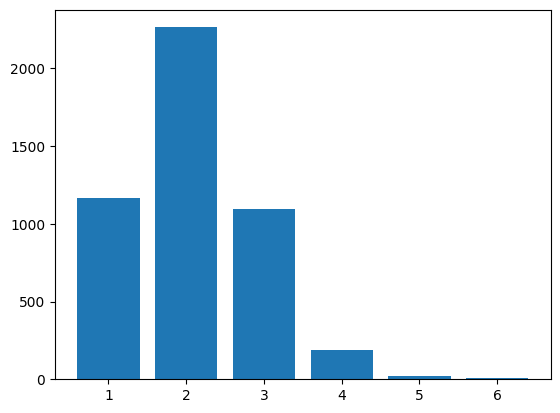

In [6]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_11064\1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

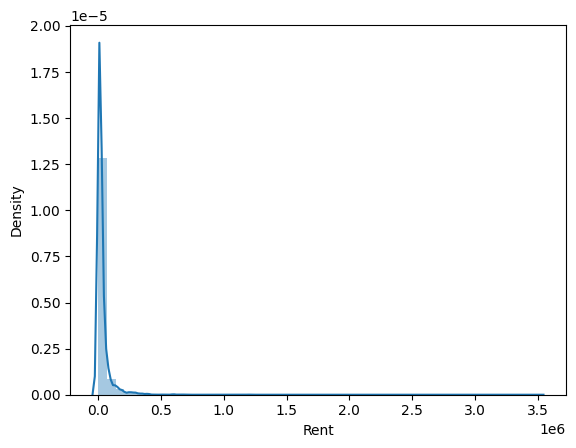

In [10]:
sns.distplot(data['Rent'])

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_11064\1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

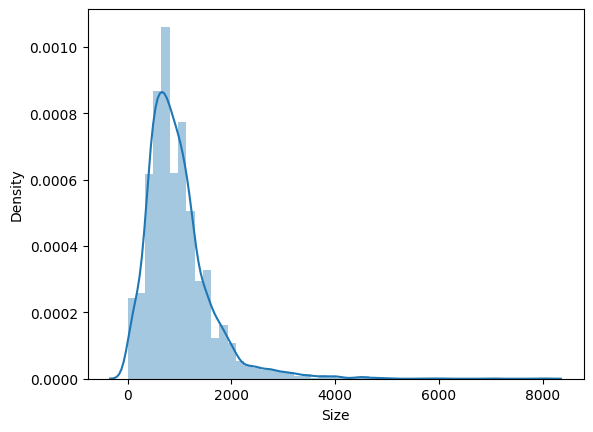

In [13]:
sns.distplot(data['Size'])

In [16]:
data['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [17]:
data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [18]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

## Preprocessing (Encoding)


### Conversion of Categorical Variable to One-Hot Encoding


In [20]:
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Rent']]
data.head(5)

,BHK,Bathroom,Furnishing Status,Rent
0,2,2,Unfurnished,10000
1,2,1,Semi-Furnished,20000
2,2,1,Semi-Furnished,17000
3,2,1,Unfurnished,10000
4,2,1,Unfurnished,7500


In [21]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first=True)
    data = data.drop(column, axis=1)
    data = data.join(encoded)
    return data

In [22]:
data = one_hot_encode(data, 'Furnishing Status')
data

,BHK,Bathroom,Rent,Semi-Furnished,Unfurnished
0,2,2,10000,False,True
1,2,1,20000,True,False
2,2,1,17000,True,False
3,2,1,10000,False,True
4,2,1,7500,False,True
...,...,...,...,...,...
4741,2,2,15000,True,False
4742,3,3,29000,True,False
4743,3,3,35000,True,False
4744,3,2,45000,True,False


## Preprocessing (Training and Test Split)


In [23]:
X = data.drop('Rent', axis=1)
X

,BHK,Bathroom,Semi-Furnished,Unfurnished
0,2,2,False,True
1,2,1,True,False
2,2,1,True,False
3,2,1,False,True
4,2,1,False,True
...,...,...,...,...
4741,2,2,True,False
4742,3,3,True,False
4743,3,3,True,False
4744,3,2,True,False


In [24]:
y = data['Rent']
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Preprocessing (Standardization)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling


In [28]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.coef_

array([ 4410.30368561, 30087.93523131, -8355.90712385, -9036.37919781])

## Evaluation


### Quantitative Evaluation


In [31]:
y_preds = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

### The Coefficients


In [33]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4410.30368561 30087.93523131 -8355.90712385 -9036.37919781]


### The mean squared error


In [34]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 2693550407.36


### The coefficient of determination: 1 is perfect prediction


In [35]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.32


## Evaluation


### Qualititative Evaluation


In [36]:
sample_data = X.iloc[0]
sample_data

BHK                   2
Bathroom              2
Semi-Furnished    False
Unfurnished        True
Name: 0, dtype: object

In [37]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

d:\Programming Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

32239.375356189103

In [39]:
y.iloc[0]

10000

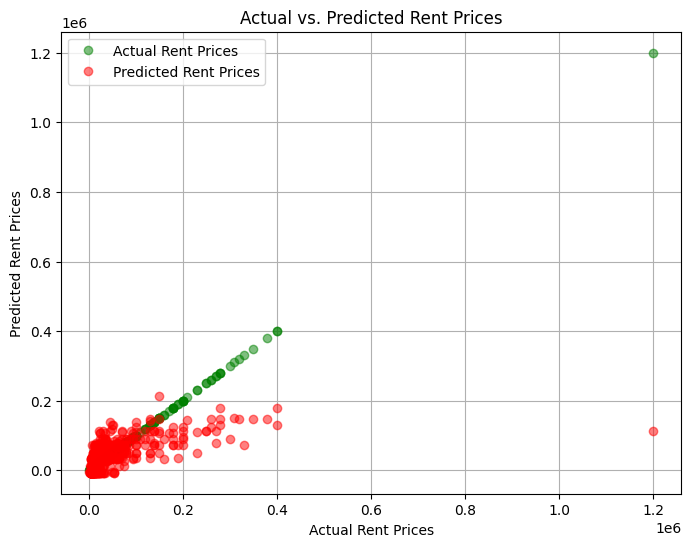

In [43]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='red', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()

